In [2]:
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv('250k Medicines Usage, Side Effects and Substitutes.csv',low_memory=False)

In [4]:
# Display the first few rows
print(df.head())

   id                      name                     substitute0  \
0   1  augmentin 625 duo tablet  Penciclav 500 mg/125 mg Tablet   
1   2       azithral 500 tablet         Zithrocare 500mg Tablet   
2   3          ascoril ls syrup                 Solvin LS Syrup   
3   4      allegra 120mg tablet                    Lcfex Tablet   
4   5            avil 25 tablet              Eralet 25mg Tablet   

              substitute1              substitute2            substitute3  \
0  Moxikind-CV 625 Tablet  Moxiforce-CV 625 Tablet     Fightox 625 Tablet   
1         Azax 500 Tablet          Zady 500 Tablet  Cazithro 500mg Tablet   
2       Ambrodil-LX Syrup        Zerotuss XP Syrup         Capex LS Syrup   
3     Etofex 120mg Tablet     Nexofex 120mg Tablet    Fexise 120mg Tablet   
4                     NaN                      NaN                    NaN   

               substitute4 sideEffect0       sideEffect1     sideEffect2  ...  \
0  Novamox CV 625mg Tablet    Vomiting            Nau

In [5]:
# Display basic statistics
print(df.describe())

                  id
count  248218.000000
mean   124109.500000
std     71654.508896
min         1.000000
25%     62055.250000
50%    124109.500000
75%    186163.750000
max    248218.000000


In [6]:
# Check for missing values
print(df.isnull().sum())

id                        0
name                      0
substitute0            9597
substitute1           14351
substitute2           17985
substitute3           21362
substitute4           24256
sideEffect0               0
sideEffect1            9802
sideEffect2           18718
sideEffect3           40580
sideEffect4           84658
sideEffect5          116960
sideEffect6          156361
sideEffect7          180468
sideEffect8          199712
sideEffect9          210510
sideEffect10         220944
sideEffect11         227887
sideEffect12         231936
sideEffect13         233491
sideEffect14         237799
sideEffect15         240537
sideEffect16         242209
sideEffect17         242836
sideEffect18         243703
sideEffect19         244272
sideEffect20         244995
sideEffect21         245093
sideEffect22         245170
sideEffect23         245313
sideEffect24         245495
sideEffect25         246715
sideEffect26         246715
sideEffect27         246724
sideEffect28        

In [7]:
# Handle missing values, for example, by filling them with 'Unknown' or dropping rows/columns
df.fillna('Unknown', inplace=True)

In [8]:
# Count the number of substitutes for each medicine
df['num_substitutes'] = df[['substitute0', 'substitute1',
'substitute2', 'substitute3',
'substitute4']].notnull().sum(axis=1)

In [9]:
# Display the top 10 medicines with the most substitutes
print(df[['name',
'num_substitutes']].sort_values(by='num_substitutes',
ascending=False).head(10))

                              name  num_substitutes
0         augmentin 625 duo tablet                5
165498  nimok p 100mg/325mg tablet                5
165470         nitnib 12.5 capsule                5
165471               nimket tablet                5
165472           nitra 200 capsule                5
165473          nikadil 5mg tablet                5
165474            ngmine injection                5
165475           neoquet 50 tablet                5
165476        nimotas 100mg tablet                5
165477               nav-lm tablet                5


In [10]:
# Combine all side effects columns into one
side_effects_columns = [f'sideEffect{i}' for i in range(42)]
side_effects = df[side_effects_columns].apply(lambda x:
x.value_counts()).sum(axis=1).sort_values(ascending=False)

# Display the top 10 most common side effects
print(side_effects.head(10))

Unknown             8815388.0
Nausea               157428.0
Diarrhea             140295.0
Vomiting             100331.0
Headache              99015.0
Dizziness             72637.0
Stomach pain          50603.0
Rash                  35749.0
Dryness in mouth      33984.0
Sleepiness            33516.0
dtype: float64


Classification Analysis

In [11]:
#Analyze how side effects and uses vary across different classes. Group by Chemical Class and analyze side effects
chemical_class_effects = df.groupby('Chemical Class')[side_effects_columns].apply(lambda x:
x.notnull().sum()).sum(axis=1)

# Display the top 10 Chemical Classes with the most side effects
print(chemical_class_effects.sort_values(ascending=False).head(10))

Chemical Class
Unknown                                                      4637934
Fluoroquinolone                                               333018
Broad Spectrum (Third & fourth generation cephalosporins)     310884
Macrolides                                                    235368
Sulfinylbenzimidazole Derivative                              204582
Broad spectrum (Third & fourth generation cephalosporins}     188664
Gluco/mineralocorticoids, progestogins and derivatives        123564
Azoles {Triazoles}                                            114828
Intermediate spectrum {Second generation cephalosporins}      112140
Carbazole Derivative                                          107814
dtype: int64


In [12]:
# Similarly, group by Therapeutic Class and Action Class
therapeutic_class_effects = df.groupby('Therapeutic Class')[side_effects_columns].apply(lambda x:
x.notnull().sum()).sum(axis=1)
action_class_effects = df.groupby('Action Class')[side_effects_columns].apply(lambda x:
x.notnull().sum()).sum(axis=1)

# Display the results
print(therapeutic_class_effects.sort_values(ascending=False).head(10))
print(action_class_effects.sort_values(ascending=False).head(10))

Therapeutic Class
ANTI INFECTIVES      2415126
GASTRO INTESTINAL    1412460
PAIN ANALGESICS      1355214
NEURO CNS             979398
RESPIRATORY           968184
CARDIAC               772002
ANTI DIABETIC         490518
OPHTHAL               444066
DERMA                 415086
HORMONES              236418
dtype: int64
Action Class
Unknown                                   4627644
Cephalosporins: 3 generation               526890
Quinolones/ Fluroquinolones                333186
Fungal ergosterol synthesis inhibitor      282702
Proton pump inhibitors                     267918
Macrolides                                 249228
Glucocorticoids                            223020
H1 Antihistaminics (second Generation)     169134
HMG CoA inhibitors (statins)               120288
Cephalosporins: 2nd generation             115542
dtype: int64


complete code for visualization

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('250k Medicines Usage, Side Effects and Substitutes.csv', low_memory=False)

# Fill missing values with 'Unknown'
df.fillna('Unknown', inplace=True)

# Define side effect columns
side_effects_columns = [f'sideEffect{i}' for i in range(42)]  # sideEffect0 to sideEffect41

# Gather all side effects into a single Series
all_side_effects = df[side_effects_columns].values.flatten()
all_side_effects = [effect for effect in all_side_effects if effect != 'Unknown']

# Count occurrences of each side effect
side_effect_counts = pd.Series(all_side_effects).value_counts()

# Analysis of substitutes
substitute_columns = [f'substitute{i}' for i in range(5)]
most_substitutes = df[substitute_columns].notnull().sum(axis=1)
df['Substitute Count'] = most_substitutes

# Get the top medicines with the most substitutes
top_medicines = df[['name', 'Substitute Count']].sort_values(by='Substitute Count', ascending=False)

# Analyze side effects by Chemical Class
chemical_class_effects = df.groupby('Chemical Class')[side_effects_columns].apply(lambda x: x.notnull().sum()).sum(axis=1)

# Analyze side effects by Therapeutic Class
therapeutic_class_effects = df.groupby('Therapeutic Class')[side_effects_columns].apply(lambda x: x.notnull().sum()).sum(axis=1)

# Analyze side effects by Action Class
action_class_effects = df.groupby('Action Class')[side_effects_columns].apply(lambda x: x.notnull().sum()).sum(axis=1)


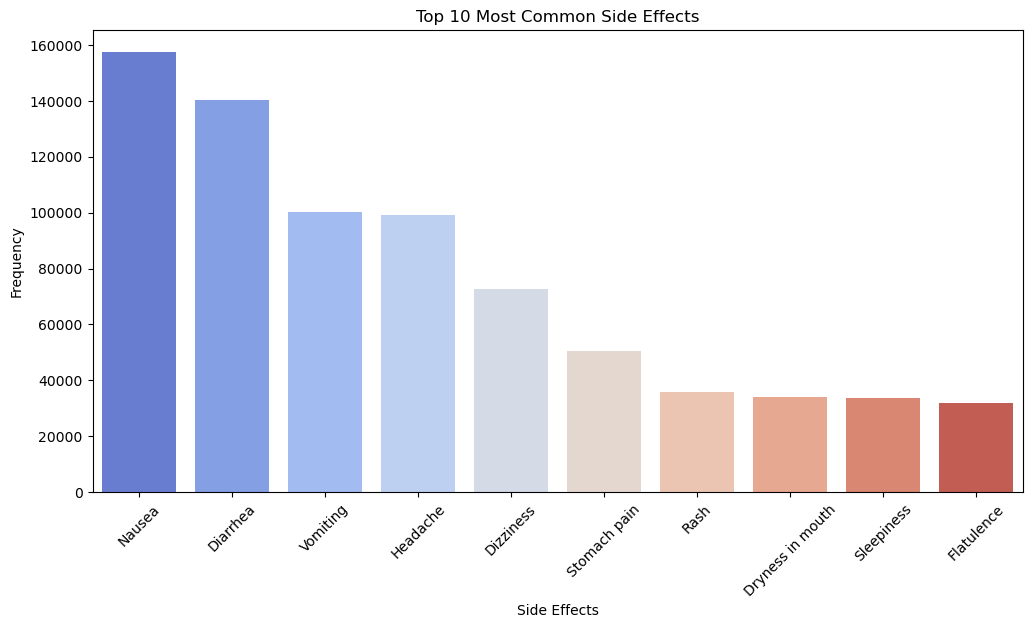

In [14]:
# Visualization of the most common side effects
plt.figure(figsize=(12, 6))
sns.barplot(x=side_effect_counts.head(10).index, y=side_effect_counts.head(10).values, palette='coolwarm')
plt.title('Top 10 Most Common Side Effects')
plt.xlabel('Side Effects')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

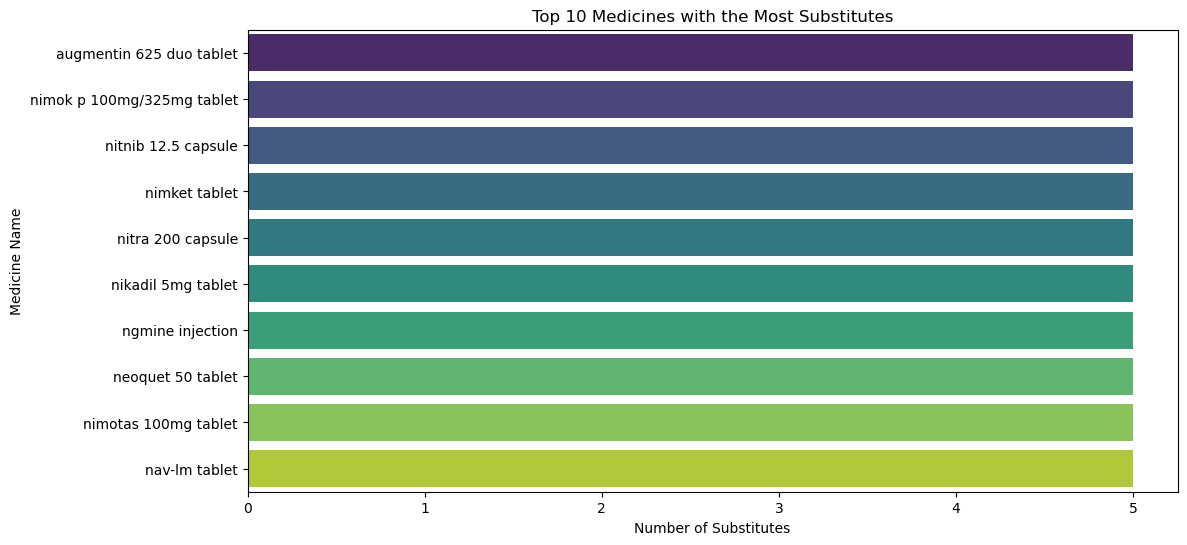

In [15]:
# Visualization of the top medicines with the most substitutes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_medicines.head(10)['Substitute Count'], y=top_medicines.head(10)['name'], palette='viridis')
plt.title('Top 10 Medicines with the Most Substitutes')
plt.xlabel('Number of Substitutes')
plt.ylabel('Medicine Name')
plt.show()

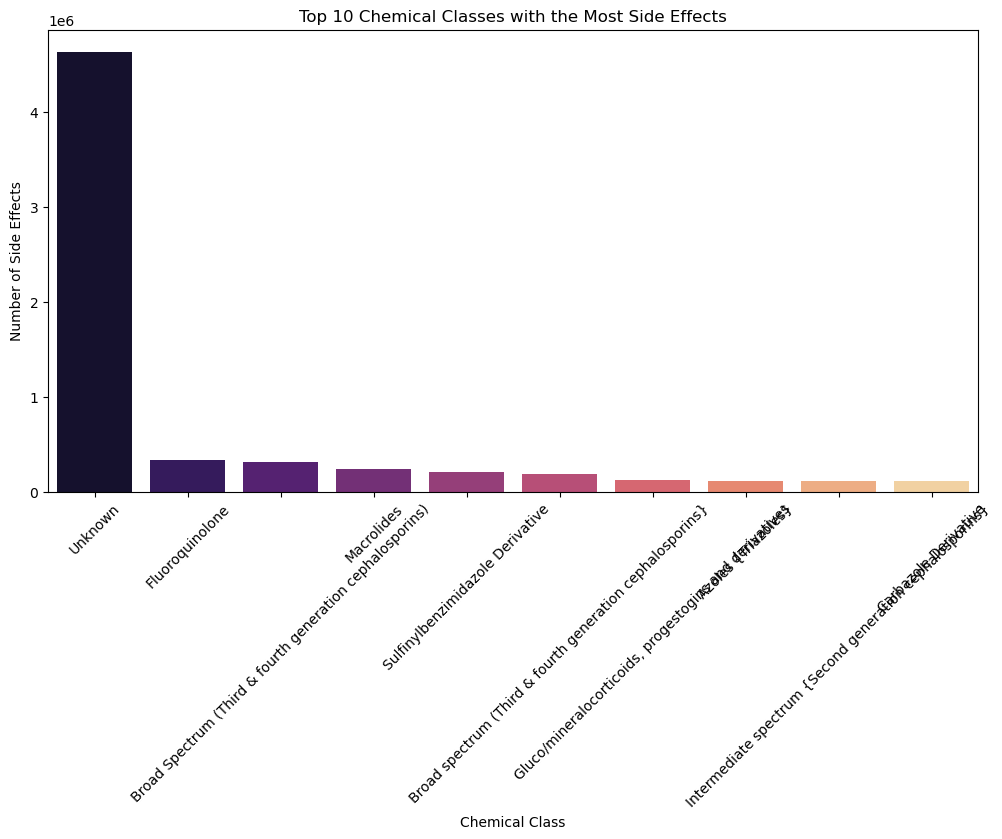

In [16]:
# Visualization of side effects by Chemical Class
plt.figure(figsize=(12, 6))
sns.barplot(x=chemical_class_effects.sort_values(ascending=False).head(10).index,
            y=chemical_class_effects.sort_values(ascending=False).head(10).values, palette='magma')
plt.title('Top 10 Chemical Classes with the Most Side Effects')
plt.xlabel('Chemical Class')
plt.ylabel('Number of Side Effects')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Displaying results for Therapeutic and Action Class (optional)
print("\nTop 10 Therapeutic Classes with the Most Side Effects:")
print(therapeutic_class_effects.sort_values(ascending=False).head(10))

print("\nTop 10 Action Classes with the Most Side Effects:")
print(action_class_effects.sort_values(ascending=False).head(10))



Top 10 Therapeutic Classes with the Most Side Effects:
Therapeutic Class
ANTI INFECTIVES      2415126
GASTRO INTESTINAL    1412460
PAIN ANALGESICS      1355214
NEURO CNS             979398
RESPIRATORY           968184
CARDIAC               772002
ANTI DIABETIC         490518
OPHTHAL               444066
DERMA                 415086
HORMONES              236418
dtype: int64

Top 10 Action Classes with the Most Side Effects:
Action Class
Unknown                                   4627644
Cephalosporins: 3 generation               526890
Quinolones/ Fluroquinolones                333186
Fungal ergosterol synthesis inhibitor      282702
Proton pump inhibitors                     267918
Macrolides                                 249228
Glucocorticoids                            223020
H1 Antihistaminics (second Generation)     169134
HMG CoA inhibitors (statins)               120288
Cephalosporins: 2nd generation             115542
dtype: int64


 Correlation Analysis

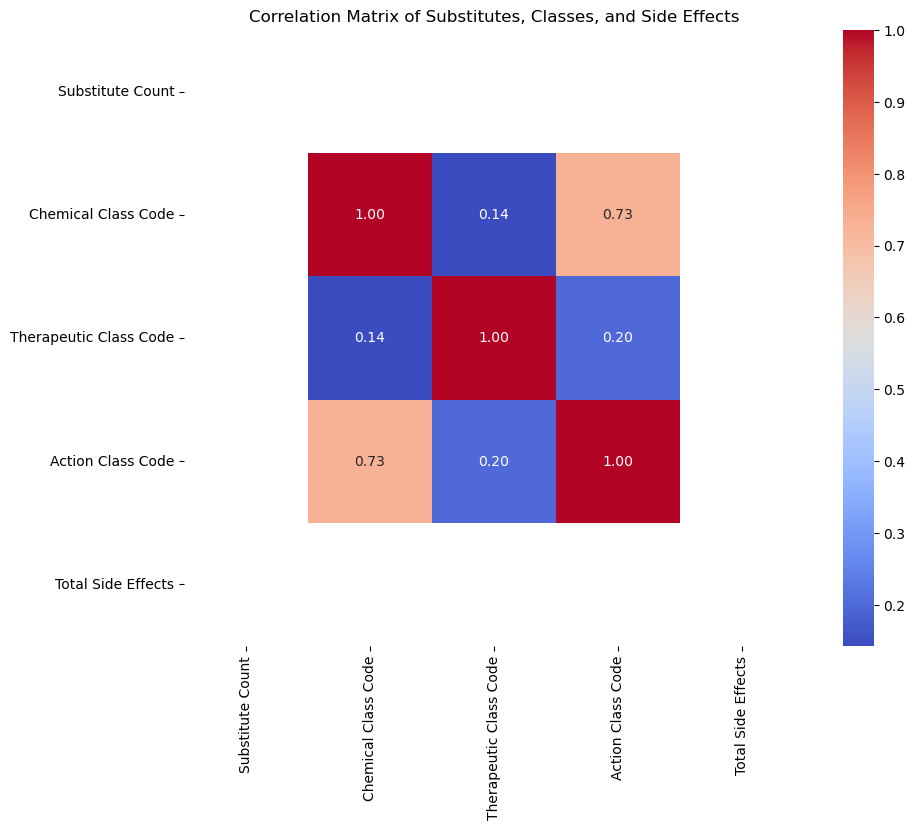

In [18]:
# Convert 'Chemical Class', 'Therapeutic Class', 'Action Class' to numerical categories
df['Chemical Class Code'] = df['Chemical Class'].astype('category').cat.codes
df['Therapeutic Class Code'] = df['Therapeutic Class'].astype('category').cat.codes
df['Action Class Code'] = df['Action Class'].astype('category').cat.codes

# Define numerical columns for correlation analysis
correlation_columns = ['Substitute Count', 'Chemical Class Code', 'Therapeutic Class Code', 'Action Class Code']

# Create a new DataFrame focusing on side effects counts
df['Total Side Effects'] = df[[f'sideEffect{i}' for i in range(42)]].notnull().sum(axis=1)

# Add 'Total Side Effects' to the list of correlation columns
correlation_columns.append('Total Side Effects')

# Calculate correlations
correlation_matrix = df[correlation_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Substitutes, Classes, and Side Effects')
plt.show()

 Clustering Analysis (Advanced)

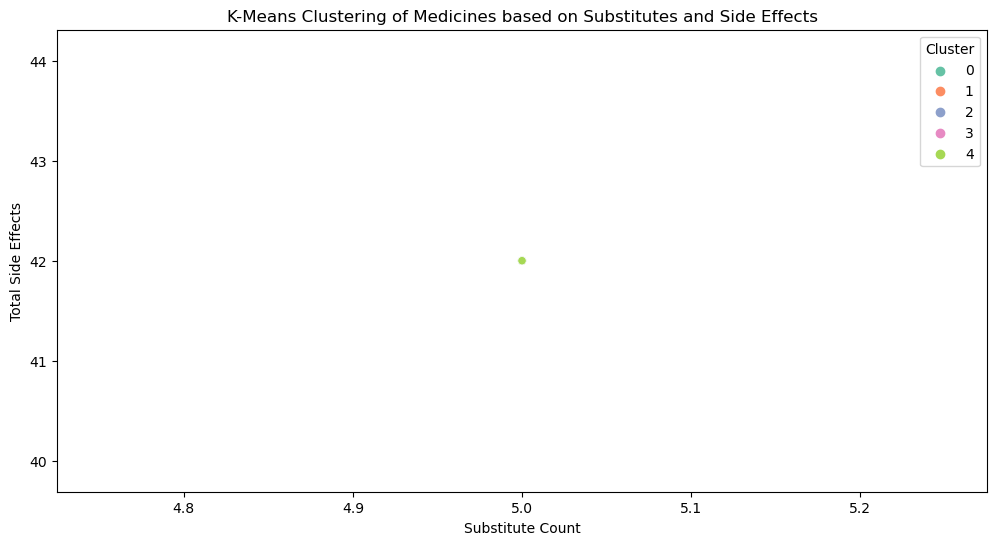

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for clustering: use 'Substitute Count', 'Total Side Effects', and classification codes
clustering_data = df[['Substitute Count', 'Total Side Effects', 'Chemical Class Code', 'Therapeutic Class Code', 'Action Class Code']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Apply K-Means Clustering with explicit n_init parameter
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clustering results
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Substitute Count'], y=df['Total Side Effects'], hue=df['Cluster'], palette='Set2')
plt.title('K-Means Clustering of Medicines based on Substitutes and Side Effects')
plt.xlabel('Substitute Count')
plt.ylabel('Total Side Effects')
plt.legend(title='Cluster')
plt.show()


Classification Model (Advanced)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare features (X) and target (y)
X = df[['Chemical Class Code', 'Therapeutic Class Code', 'Action Class Code']]
y = df['Total Side Effects'].apply(lambda x: 1 if x > 5 else 0)  # Example: classify if high side effects

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     74466

    accuracy                           1.00     74466
   macro avg       1.00      1.00      1.00     74466
weighted avg       1.00      1.00      1.00     74466

